<a href="https://colab.research.google.com/github/mrmaggoo1/MAT421/blob/main/Final_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install feature_engine
!pip install yellowbrick

# Import data manipulation libraries
import numpy as np
import pandas as pd

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pandas.plotting import scatter_matrix

# Import machine learning libraries
from sklearn.model_selection import train_test_split
from feature_engine.transformation import YeoJohnsonTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

# Set plot to be displayed inline
%matplotlib inline

# Read in the dataset
data = pd.read_csv('Car_Purchasing_Data.csv')

# Extract each column from the dataset
customer_id = data.iloc[:, 0]
customer_email = data.iloc[:, 1]
country = data.iloc[:, 2]
gender = data.iloc[:, 3]
age = data.iloc[:, 4]
annual_salary = data.iloc[:, 5]
credit_card_debt = data.iloc[:, 6]
net_worth = data.iloc[:, 7]
car_purchase_amount = data.iloc[:, 8]

# Display the first few rows of the dataset
data.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


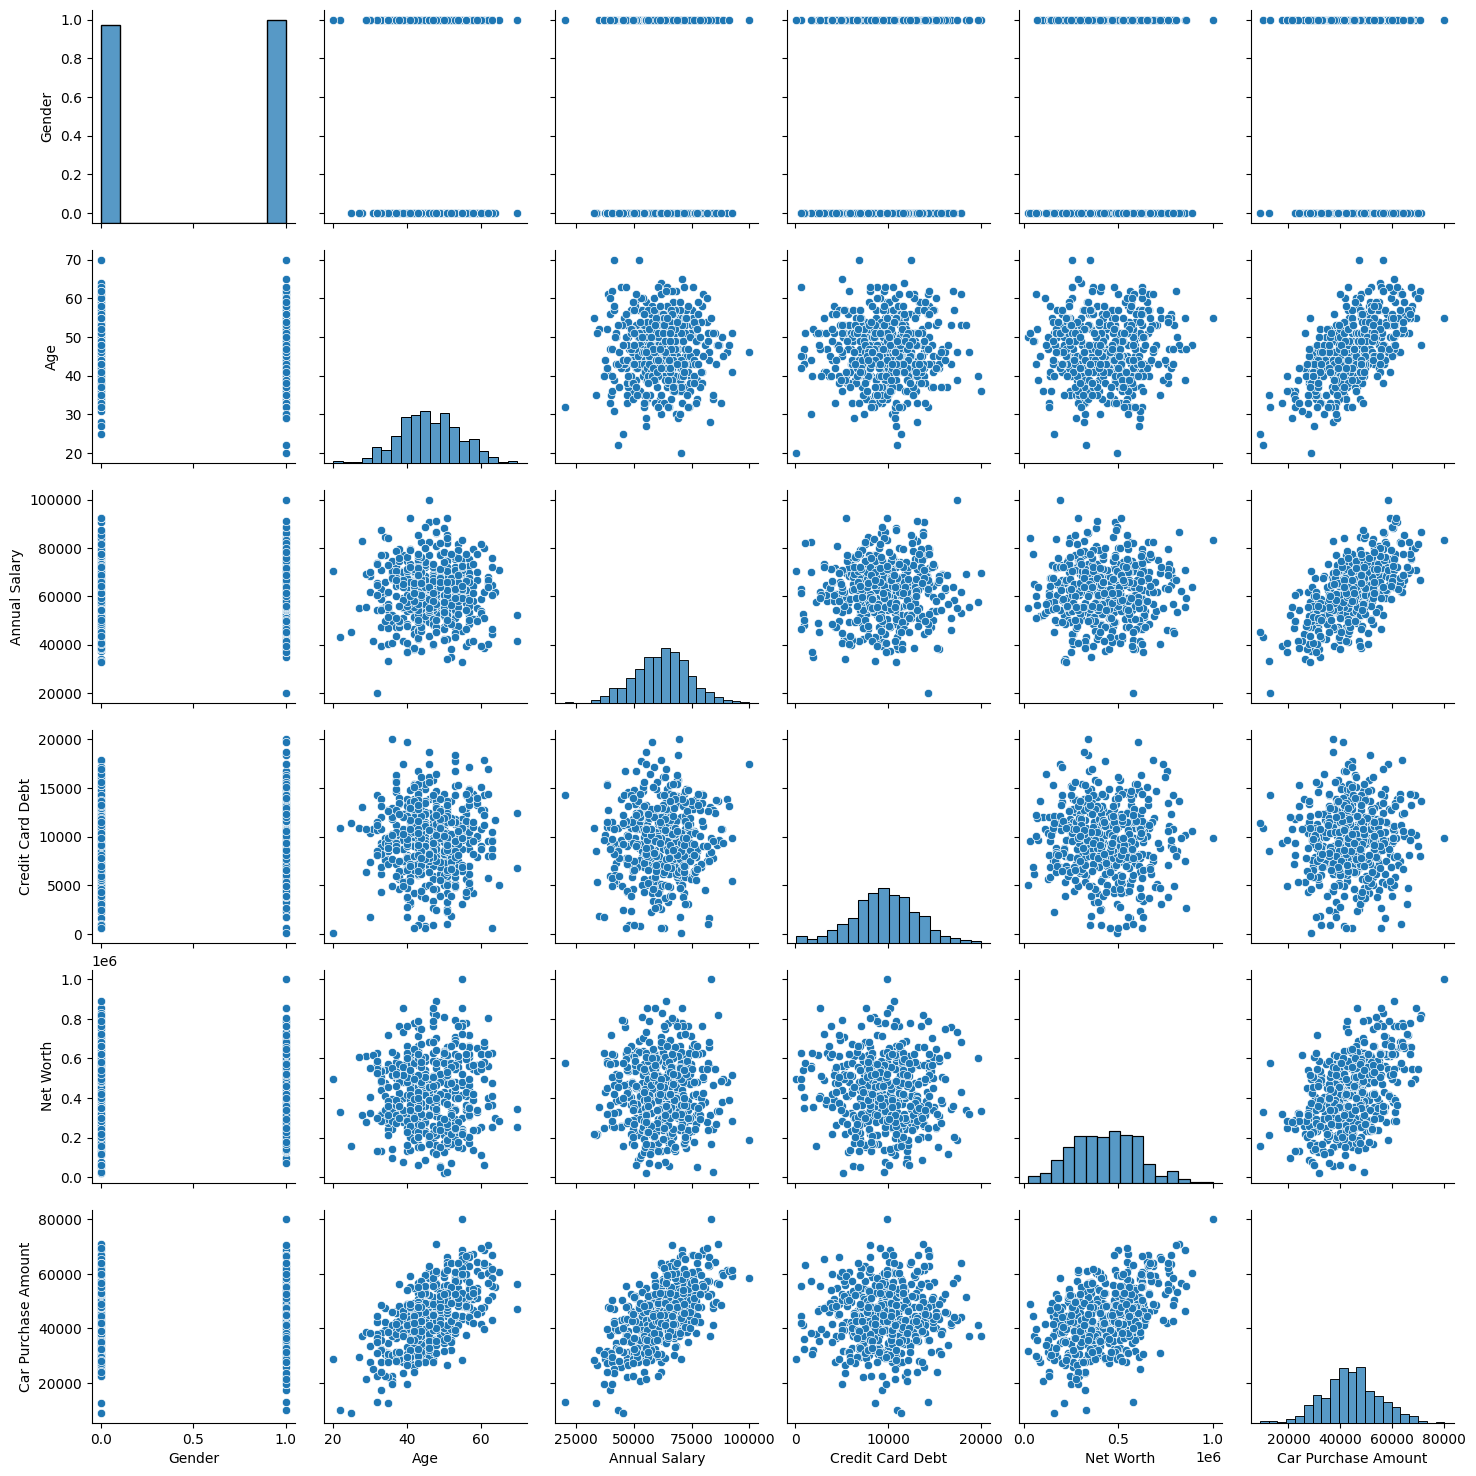

In [ ]:
sns.pairplot(data)

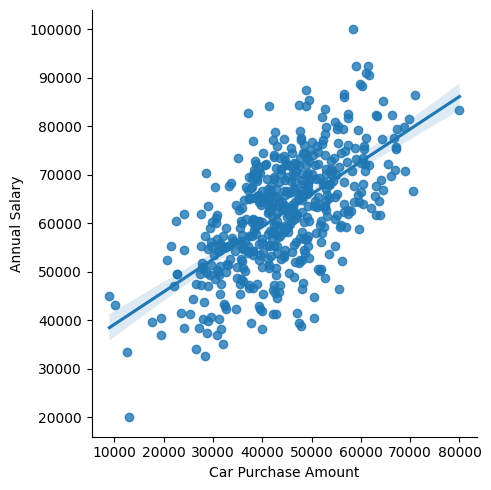

In [ ]:
sns.lmplot(x='Car Purchase Amount',y ='Annual Salary', data=data)

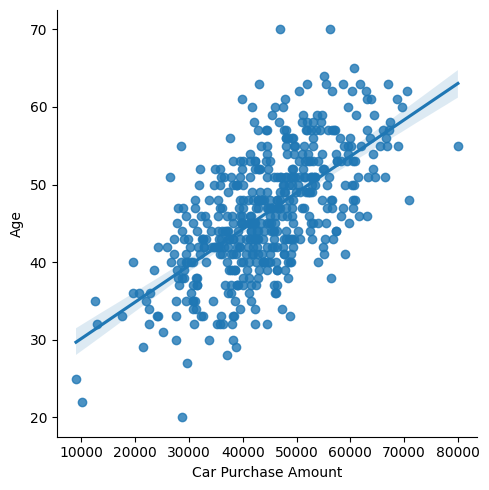

In [ ]:
sns.lmplot(x='Car Purchase Amount',y ='Age', data=data)

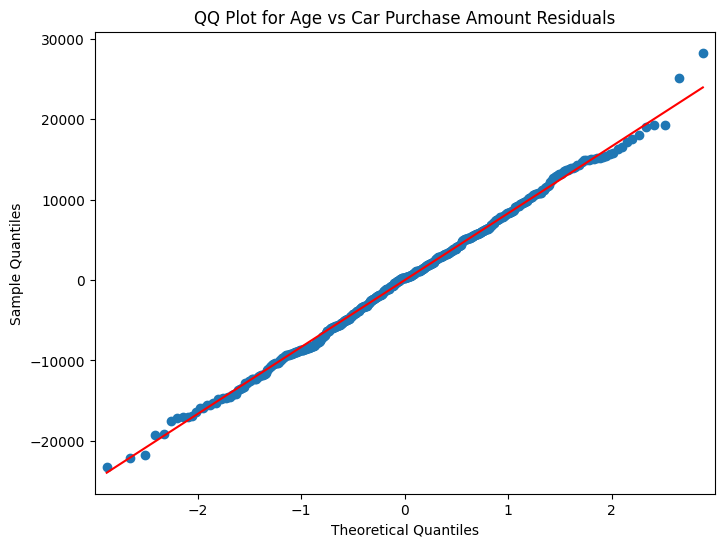

In [ ]:
car_purchase_amount = car_purchase_amount.reset_index(drop=True)
age = age.reset_index(drop=True)

# Fit a linear regression model for age vs car purchase amount
model = sm.OLS(car_purchase_amount, sm.add_constant(age)).fit()

# Get the residuals from the model
resid = model.resid

# Create QQ plot for age vs car purchase amount residuals
fig, ax = plt.subplots(figsize=(8,6))
qqplot(resid, line='s', ax=ax)
ax.set_title("QQ Plot for Age vs Car Purchase Amount Residuals")
plt.show()

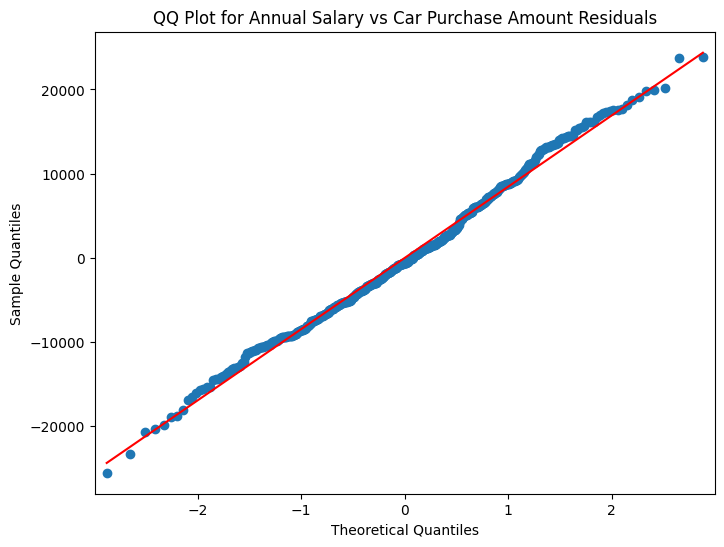

In [ ]:
car_purchase_amount = car_purchase_amount.reset_index(drop=True)
annual_salary = annual_salary.reset_index(drop=True)

# Fit a linear regression model for age vs car purchase amount
model = sm.OLS(car_purchase_amount, sm.add_constant(annual_salary)).fit()

# Get the residuals from the model
resid = model.resid

# Create QQ plot for age vs car purchase amount residuals
fig, ax = plt.subplots(figsize=(8,6))
qqplot(resid, line='s', ax=ax)
ax.set_title("QQ Plot for Annual Salary vs Car Purchase Amount Residuals")
plt.show()

In [ ]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data.drop(['Car Purchase Amount'], axis=1), data['Car Purchase Amount'], test_size=0.2, random_state=0)

# Print the shape of the training and testing sets
print("Shape of training set:", x_train.shape)
print("Shape of testing set:", x_test.shape)

Shape of training set: (400, 8)
Shape of testing set: (100, 8)


In [ ]:
# display the data types of each column in the training set
x_train.dtypes

Customer Name        object
Customer e-mail      object
Country              object
Gender                int64
Age                   int64
Annual Salary       float64
Credit Card Debt    float64
Net Worth           float64
dtype: object

In [ ]:
# Identify discrete variables (numeric variables with less than 10 unique values) 
discrete_variable = [var for var in x_train.columns if x_train[var].dtype != 'O' and x_train[var].nunique() < 10]

# Identify continuous variables (numeric variables with more than 10 unique values)
continuous_variable = [var for var in x_train.columns if x_train[var].dtype != 'O' and var not in discrete_variable]

# Identify categorical variables (non-numeric variables)
categorical_variable = [var for var in x_train.columns if x_train[var].dtype == 'O']

# Print the number of variables in each category
print('There are {} discrete variables'.format(len(discrete_variable)))
print('There are {} continuous variables'.format(len(continuous_variable)))
print('There are {} categorical variables'.format(len(categorical_variable)))

There are 1 discrete variables
There are 4 continuous variables
There are 3 categorical variables


In [ ]:
# Loop through each categorical variable
for var in categorical_variable:
    
    # Print the variable name and number of unique values (cardinality)
    print('Cardinality in {}: {}'.format(var, x_train[var].nunique()))

Cardinality in Customer Name: 398
Cardinality in Customer e-mail: 400
Cardinality in Country: 1


<Axes: >

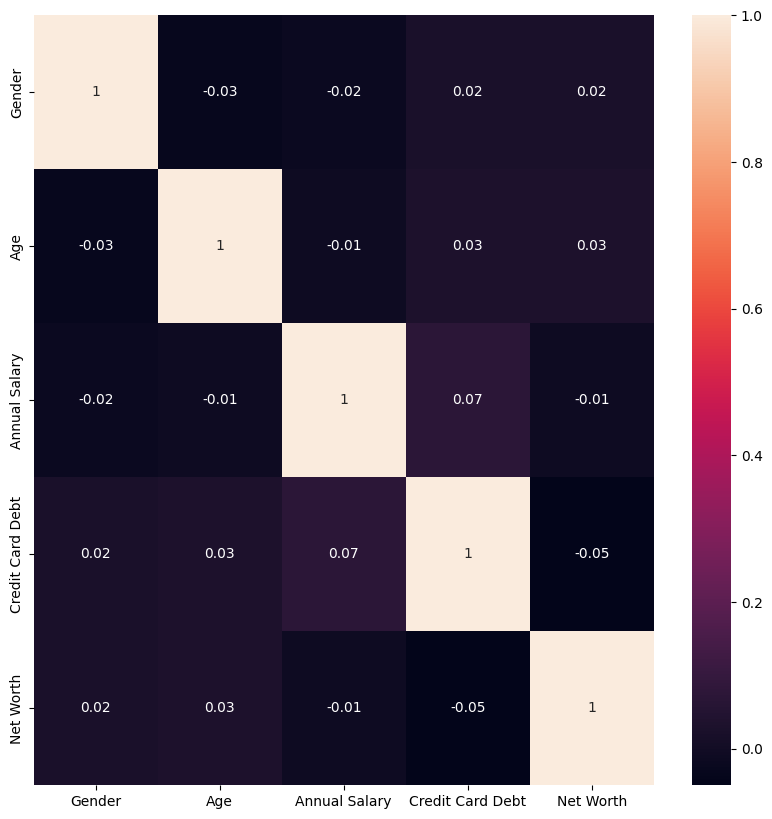

In [ ]:
# Compute correlation matrix using numpy's corr function
correlation_matrix = np.round(x_train.corr(),2)

# Create a new figure and set its size
fig = plt.figure(figsize=(10,10))

# Create a heatmap using seaborn's heatmap function
# Data to plot is the correlation matrix
# Set annot to True to display correlation values in each cell
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
# generates descriptive statistics of the numerical columns in the x_train dataset
x_train.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.510000,46.302500,61897.799976,9586.155970,428488.672912
std,0.500526,8.026335,11726.357869,3470.414455,173673.011178
min,0.000000,20.000000,20000.000000,100.000000,20000.000000
25%,0.000000,41.000000,54093.853330,7405.170891,297398.763175
50%,1.000000,46.000000,62701.660565,9648.837620,419939.345000
75%,1.000000,51.250000,69832.285215,11866.807658,553344.262325
max,1.000000,70.000000,100000.000000,18693.146520,1000000.000000


In [ ]:
# quickly inspect the data and get an idea of what it looks like
x_train.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
107,Wing Gray,urna.nec@tempusscelerisquelorem.org,USA,1,50,42433.54619,7335.524826,386057.4210
336,"Brady, Oscar Y.",erat@urnaUttincidunt.com,USA,0,51,71921.45038,6354.372629,169714.2655
71,Marvin Becker,congue.elit@vestibulumneceuismod.ca,USA,0,56,57393.82872,5627.803654,411831.0371
474,Avye,Cras@eros.net,USA,0,32,73558.87334,11164.526520,301245.7708
6,Griffin Rivera,vehicula@at.co.uk,USA,1,47,39814.52200,5958.460188,326373.1812


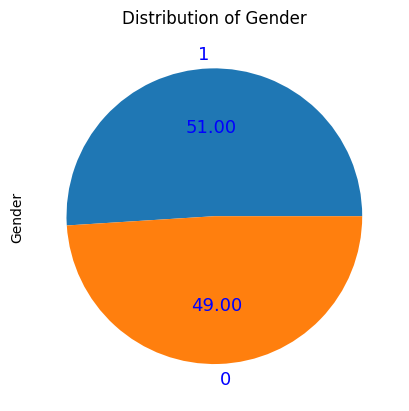

In [ ]:
# Plot a pie chart showing the distribution of values in the 'Gender' column of x_train
x_train['Gender'].value_counts().plot.pie(fontsize=13, autopct = '%.2f', textprops={'color':'b'})
# Set the title of the plot
plt.title('Distribution of Gender')
# Display the plot
plt.show()

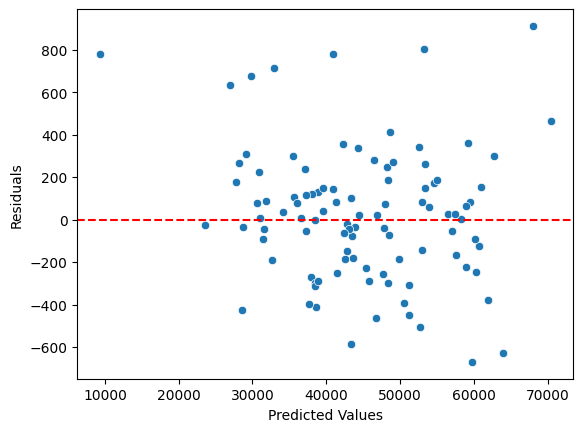

Mean absolute error:  237.0552169474743
Root mean squared error:  15.396597576980255
R2 score:  0.9991807881516424


In [ ]:
# Drop categorical variables from both train and test datasets
x_train.drop(categorical_variable, axis=1, inplace=True)
x_test.drop(categorical_variable, axis=1, inplace=True)

# Convert discrete variables to object data type
for var in discrete_variable:
    x_train[var] = x_train[var].astype('O')
    x_test[var] = x_test[var].astype('O')

# Use MeanEncoder to encode discrete variables
from feature_engine.encoding import MeanEncoder
encoder = MeanEncoder(variables=discrete_variable)

encoder.fit(x_train, y_train)

# Transform discrete variables in both train and test datasets using the encoder
x_train = encoder.transform(x_train)
x_test = encoder.transform(x_test)

# Use Winsorizer to cap the outliers in continuous variables
from feature_engine.outliers import Winsorizer
outlier_cap = Winsorizer(capping_method='gaussian', tail='both', variables=continuous_variable)

outlier_cap.fit(x_train)

# Transform continuous variables in both train and test datasets using the Winsorizer
x_train = outlier_cap.transform(x_train)
x_test = outlier_cap.transform(x_test)

# Apply Yeo-Johnson transformation to continuous variables in training and testing sets
transformer = YeoJohnsonTransformer(variables=continuous_variable)
transformer.fit(x_train)
x_train = transformer.transform(x_train)
x_test = transformer.transform(x_test)

# Instantiate the RobustScaler
scaler = RobustScaler()

# Fit the scaler to the training data
scaler.fit(x_train)

# Transform the training and test data using the scaler
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Instantiate a linear regression model
linear_reg = LinearRegression()

# Fit the model to the training data
linear_reg.fit(x_train, y_train)

# Use the fitted model to predict the target variable for the test set
y_linear_pred = linear_reg.predict(x_test)

# Calculate the residuals
residuals = y_test - y_linear_pred
# Plot the residuals
sns.scatterplot(x=y_linear_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Print the mean absolute error
print('Mean absolute error: ', mean_absolute_error(y_test, y_linear_pred))

# Print the root mean squared error
print('Root mean squared error: ', np.sqrt(mean_absolute_error(y_test, y_linear_pred)))

# Print the R2 score
print('R2 score: ', r2_score(y_test, y_linear_pred))

In [ ]:
# Get coefficients of the linear regression model
linear_reg.coef_

# Create a pandas DataFrame to show the coefficients for each feature
coef_df = pd.DataFrame(data=linear_reg.coef_, 
                       index=['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth'], 
                       columns=['Coefficient'])
coef_df

,Coefficient
Gender,38.675968
Age,8672.818866
Annual Salary,8910.492270
Credit Card Debt,28.566808
Net Worth,7331.575663


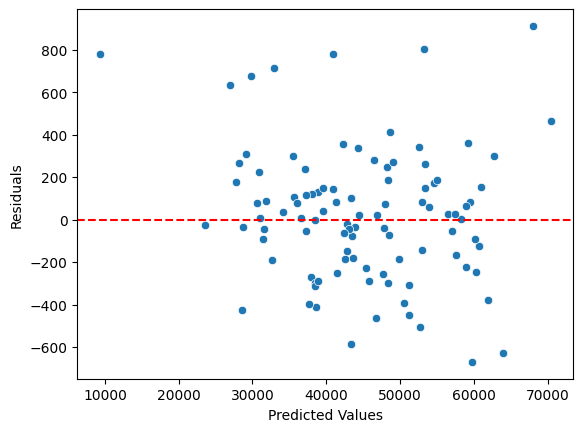

In [ ]:
# Create an instance of LinearRegression
lr = LinearRegression()

# Fit the model using the training data
lr.fit(x_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(x_test)

# Calculate the residuals
residuals = y_test - y_pred

# Plot the residuals
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()